<a href="https://colab.research.google.com/github/m1full/test2/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout




In [11]:
# Сваля директорията съдържаща Dataset-a със снимки
!git clone https://github.com/m1full/test2

Cloning into 'test2'...
remote: Enumerating objects: 30003, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30003 (delta 0), reused 2 (delta 0), pack-reused 30000 (from 1)
Receiving objects: 100% (30003/30003), 946.73 MiB | 37.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (17763/17763), done.


In [4]:
#  Създаване на празни масиви за данните и етикетите
data = []
labels = []
classes = 2
cur_path = "/content/test2"
#Зарежда снимките
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Конвертира списъците към Numpy масив
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)




(17760, 30, 30, 3) (17760,)


In [5]:
# Converting lists into numpy arrays and normalizing
data = np.array(data) / 255.0
labels = np.array(labels)

print(data.shape, labels.shape)

# 80 тест и 20 валидация
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Създаване на категории
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)



(17760, 30, 30, 3) (17760,)
(14208, 30, 30, 3) (3552, 30, 30, 3) (14208,) (3552,)


In [6]:
# Създаване на модел
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))

# Компилиране на модел
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Трениране на модел
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

# Saving the model
model.save("vehicle_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.6945 - loss: 0.7108 - val_accuracy: 0.8877 - val_loss: 0.2677
Epoch 2/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 64s 144ms/step - accuracy: 0.9192 - loss: 0.1971 - val_accuracy: 0.9006 - val_loss: 0.3133
Epoch 3/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.9528 - loss: 0.1343 - val_accuracy: 0.9702 - val_loss: 0.0879
Epoch 4/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9686 - loss: 0.0860 - val_accuracy: 0.9592 - val_loss: 0.1069
Epoch 5/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 84s 123ms/step - accuracy: 0.9676 - loss: 0.0958 - val_accuracy: 0.9730 - val_loss: 0.0772
Epoch 6/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 82s 123ms/step - accuracy: 0.9778 - loss: 0.0596 - val_accuracy: 0.9825 - val_loss: 0.0562
Epoch 7/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 79s 116ms/step - accuracy: 0.9841 - loss: 0.0456 - val_accuracy: 0.9809 - val_loss: 0.0581
Epoch 8/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 92s 138ms/step - accuracy: 0.9767 - loss: 0

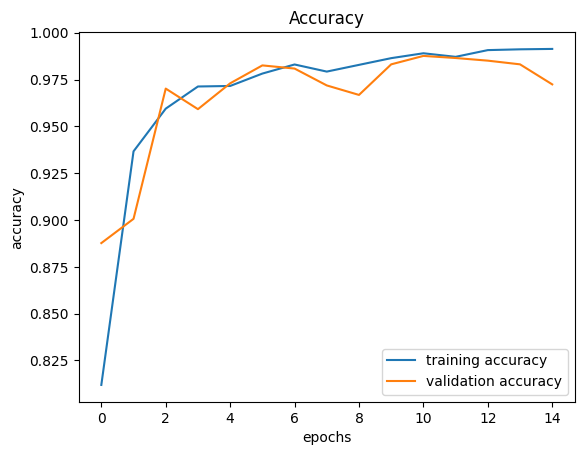

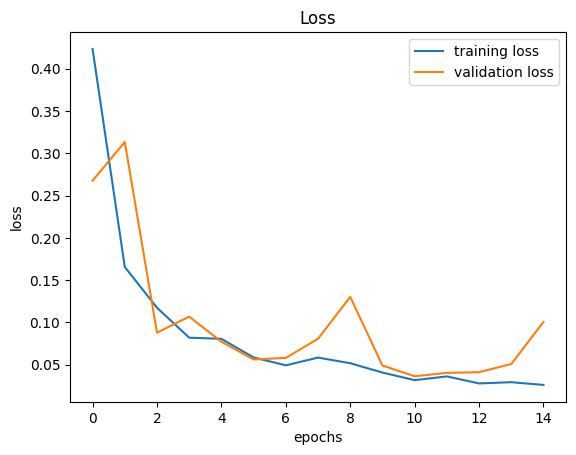

In [12]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# Convert the list of images to a NumPy array and normalize
X_test = np.array(data) / 255.0



model.save("vehicle_model_after_testing.h5")